## Data Ingestion

#### Dataset
The primary goal of this project is to build a predictive model that can accurately estimate delivery times for 

e-commerce orders based on various factors such as agent characteristics, geographic distance, time variables, weather 

conditions, traffic, and product categories.

#### Independent Features (Predictors):

* Order_ID: Unique identifier for each order.

* Agent_Age: Age of the delivery agent.

* Agent_Rating: Rating of the delivery agent.

* Store_Latitude/Longitude: Geographic location of the store.

* Drop_Latitude/Longitude: Geographic location of the delivery address.

* Order_Date/Order_Time: Date and time when the order was placed.

* Pickup_Time: Time when the delivery agent picked up the order.

* Weather: Weather conditions during delivery.

* Traffic: Traffic conditions during delivery.

* Vehicle: Mode of transportation used for delivery.

* Area: Type of delivery area (Urban/Metropolitan).

* Category: Category of the product being delivered.

#### Dependent Feature (Target Variable):

* Delivery_Time: Target variable representing the actual time taken for delivery (in hours).


In [26]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [27]:
data=pd.read_csv("/Users/nehadhananju/Desktop/AmazonDeliveryTimePrediction/data/amazon_delivery.csv")

## EDA 

In [28]:
data.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [29]:
data.shape

(43739, 16)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [31]:
# Checking the null values

data.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [32]:
# Checking the duplicate values

data.duplicated().sum()

0

Text(0.5, 1.0, 'Distribution of Delivery Time')

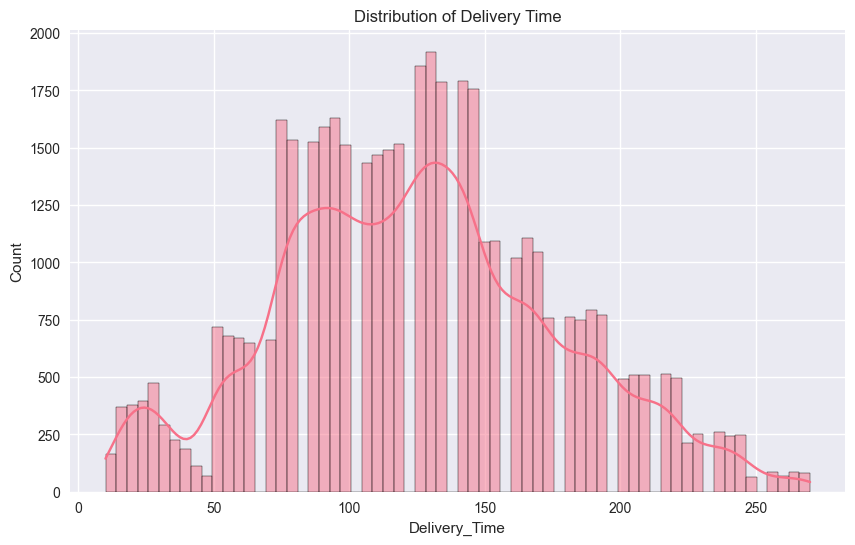

In [58]:
# Check target variable distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Delivery_Time'], kde=True)
plt.title('Distribution of Delivery Time')

####  Separate Variables

In [35]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()


In [37]:
# Remove Order_ID from categorical (it's an identifier)
if 'Order_ID' in categorical_cols:
    categorical_cols.remove('Order_ID')

# Check for low-cardinality numerical variables that should be categorical
low_cardinality_numerical = []
for col in numerical_cols:
    if data[col].nunique() < 10 and col != 'Delivery_Time':  # Exclude target variable
        low_cardinality_numerical.append(col)

# Move them to categorical
numerical_cols = [col for col in numerical_cols if col not in low_cardinality_numerical]
categorical_cols.extend(low_cardinality_numerical)

# DateTime columns
datetime_cols = ['Order_Date', 'Order_Time', 'Pickup_Time']

print(f"Numerical Variables: {numerical_cols}")
print(f"Categorical Variables: {categorical_cols}")
print(f"DateTime Variables: {datetime_cols}")


Numerical Variables: ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Delivery_Time']
Categorical Variables: ['Order_Date', 'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
DateTime Variables: ['Order_Date', 'Order_Time', 'Pickup_Time']


#### Numerical EDA 

=== NUMERICAL VARIABLES EDA ===

Basic Statistics:
          Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
count  43739.000000  43685.000000    43739.000000     43739.000000   
mean      29.567137      4.633780       17.210960        70.661177   
std        5.815155      0.334716        7.764225        21.475005   
min       15.000000      1.000000      -30.902872       -88.366217   
25%       25.000000      4.500000       12.933298        73.170283   
50%       30.000000      4.700000       18.551440        75.898497   
75%       35.000000      4.900000       22.732225        78.045359   
max       50.000000      6.000000       30.914057        88.433452   

       Drop_Latitude  Drop_Longitude  Delivery_Time  
count   43739.000000    43739.000000   43739.000000  
mean       17.459031       70.821842     124.905645  
std         7.342950       21.153148      51.915451  
min         0.010000        0.010000      10.000000  
25%        12.985996       73.280000      90.000

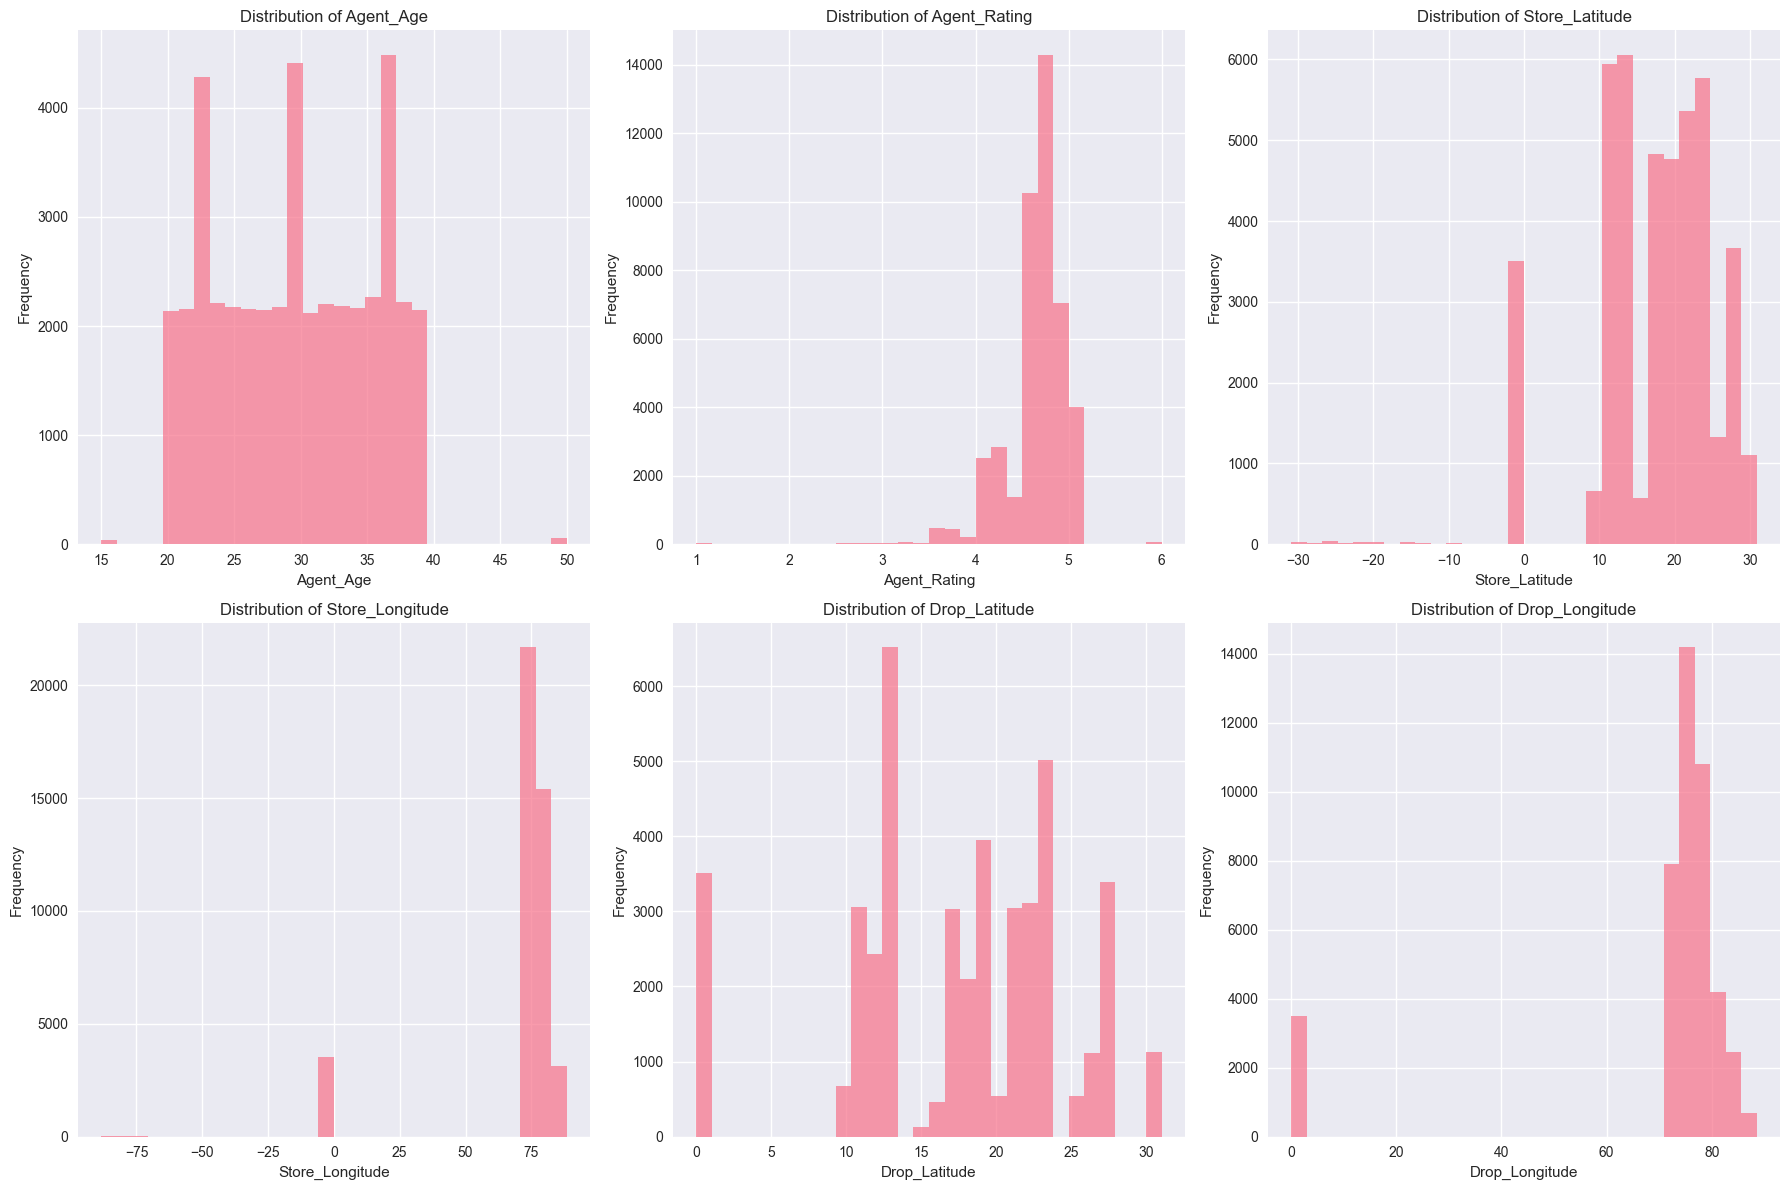

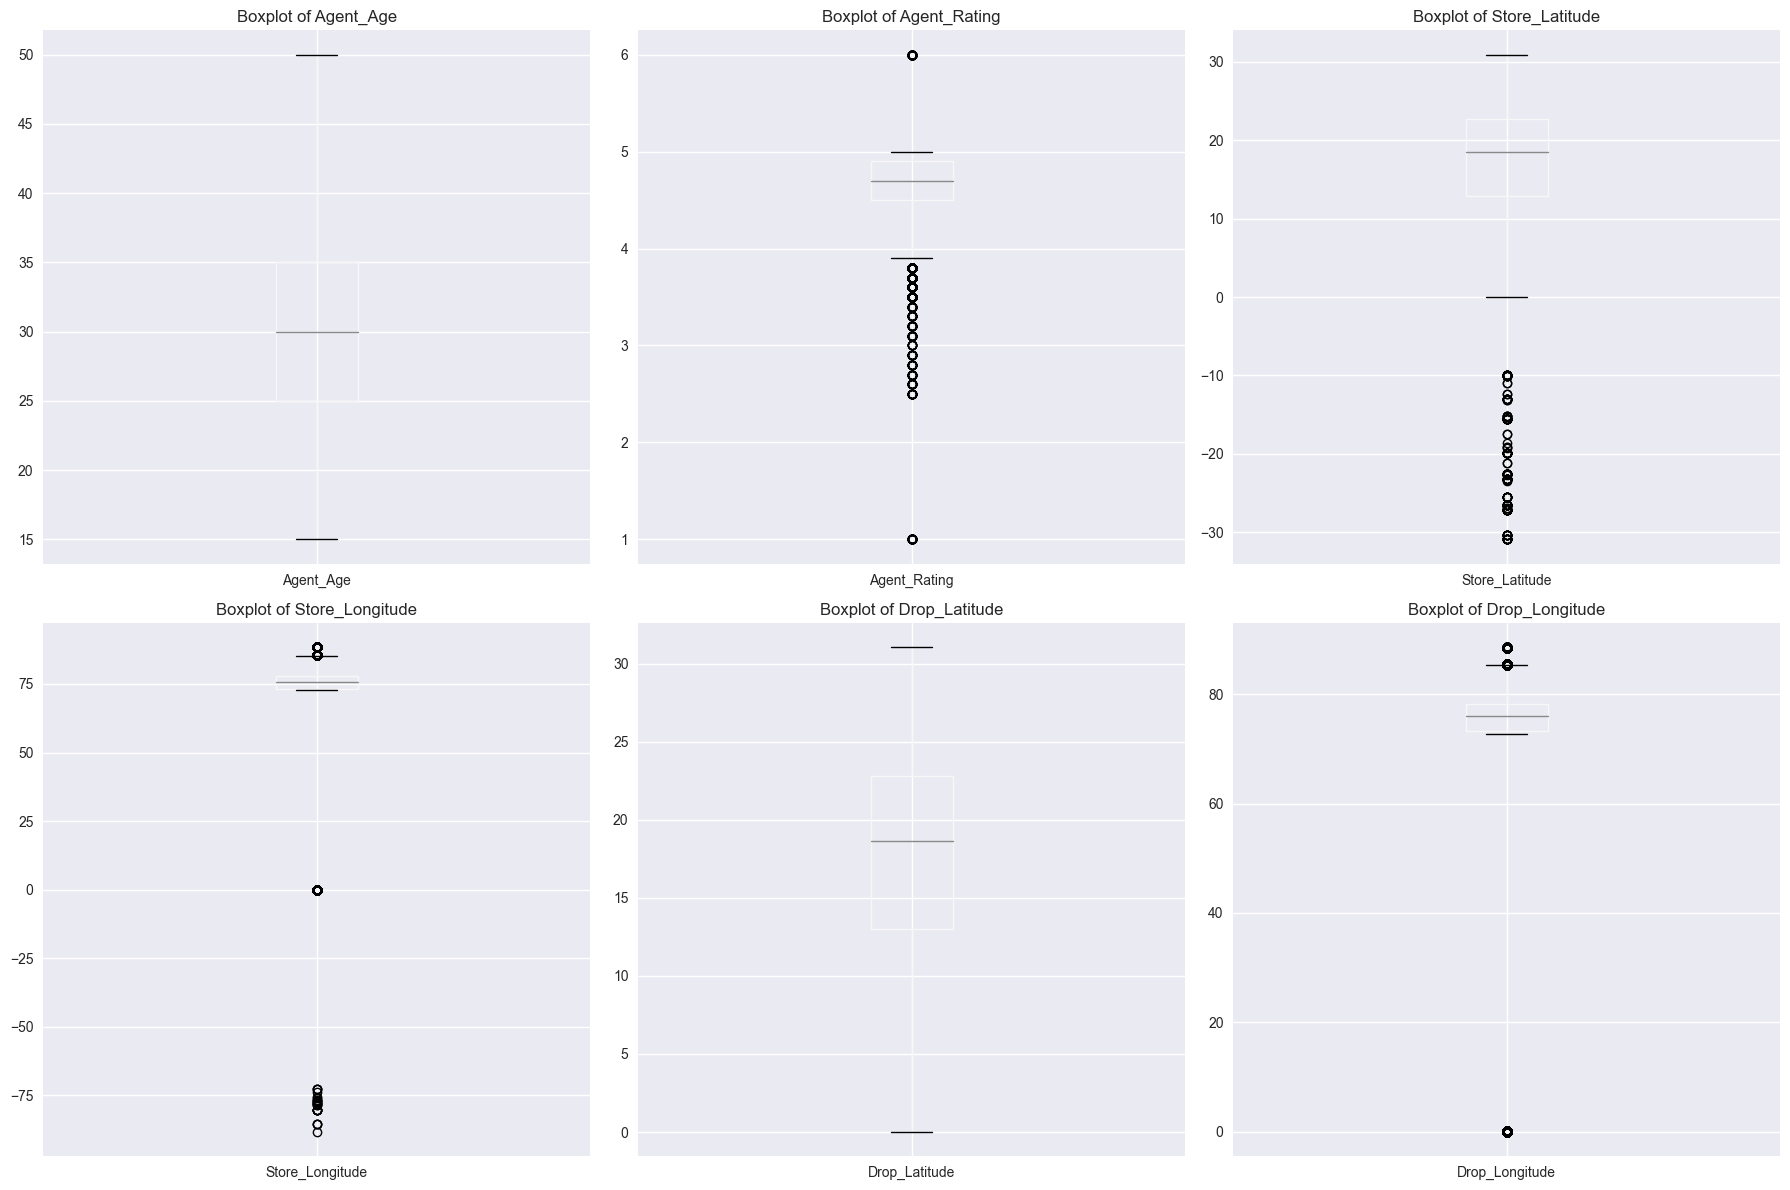

In [ ]:
print("=== NUMERICAL VARIABLES EDA ===")

# Basic statistics
print("\nBasic Statistics:")
print(data[numerical_cols].describe())

# Check for missing values
print("\nMissing Values in Numerical Variables:")
print(data[numerical_cols].isnull().sum())

# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < 6:
        data[col].hist(bins=30, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Boxplots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < 6:
        data.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

#### Correlation Analysis

Correlation Matrix:


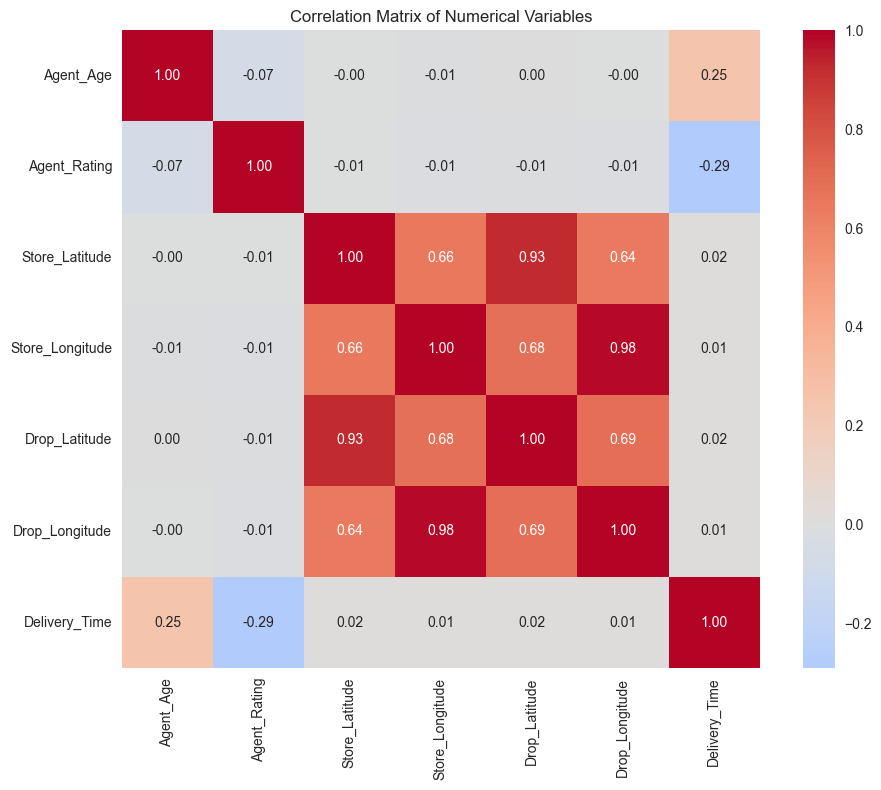

Correlation with Delivery_Time:
Delivery_Time      1.000000
Agent_Age          0.254618
Store_Latitude     0.017009
Drop_Latitude      0.016928
Drop_Longitude     0.011523
Store_Longitude    0.011173
Agent_Rating      -0.289984
Name: Delivery_Time, dtype: float64


In [39]:
# Correlation matrix
print("Correlation Matrix:")
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Correlation with target variable
print("Correlation with Delivery_Time:")
correlation_with_target = data[numerical_cols].corr()['Delivery_Time'].sort_values(ascending=False)
print(correlation_with_target)

#### Categorical Variables EDA

=== CATEGORICAL VARIABLES EDA ===
Value Counts for Categorical Variables:

Order_Date:
Order_Date
2022-03-15    1141
2022-04-03    1133
2022-03-13    1123
2022-03-26    1119
2022-03-03    1119
2022-03-09    1117
2022-03-05    1112
2022-03-24    1112
2022-03-21    1107
2022-04-05    1106
2022-03-19    1103
2022-03-11    1094
2022-03-07    1093
2022-04-01    1092
2022-03-28    1092
2022-03-30    1091
2022-03-17    1085
2022-03-01    1076
2022-03-02     969
2022-03-16     955
2022-03-06     949
2022-03-10     947
2022-03-20     945
2022-04-02     945
2022-03-04     944
2022-02-11     940
2022-03-29     938
2022-03-18     932
2022-03-27     932
2022-03-25     931
2022-03-14     931
2022-03-12     931
2022-03-31     929
2022-02-13     924
2022-03-23     922
2022-03-08     919
2022-04-06     918
2022-04-04     905
2022-02-17     905
2022-02-15     904
2022-02-12     837
2022-02-16     827
2022-02-14     826
2022-02-18     819
Name: count, dtype: int64
Number of unique values: 44

Order_Time:

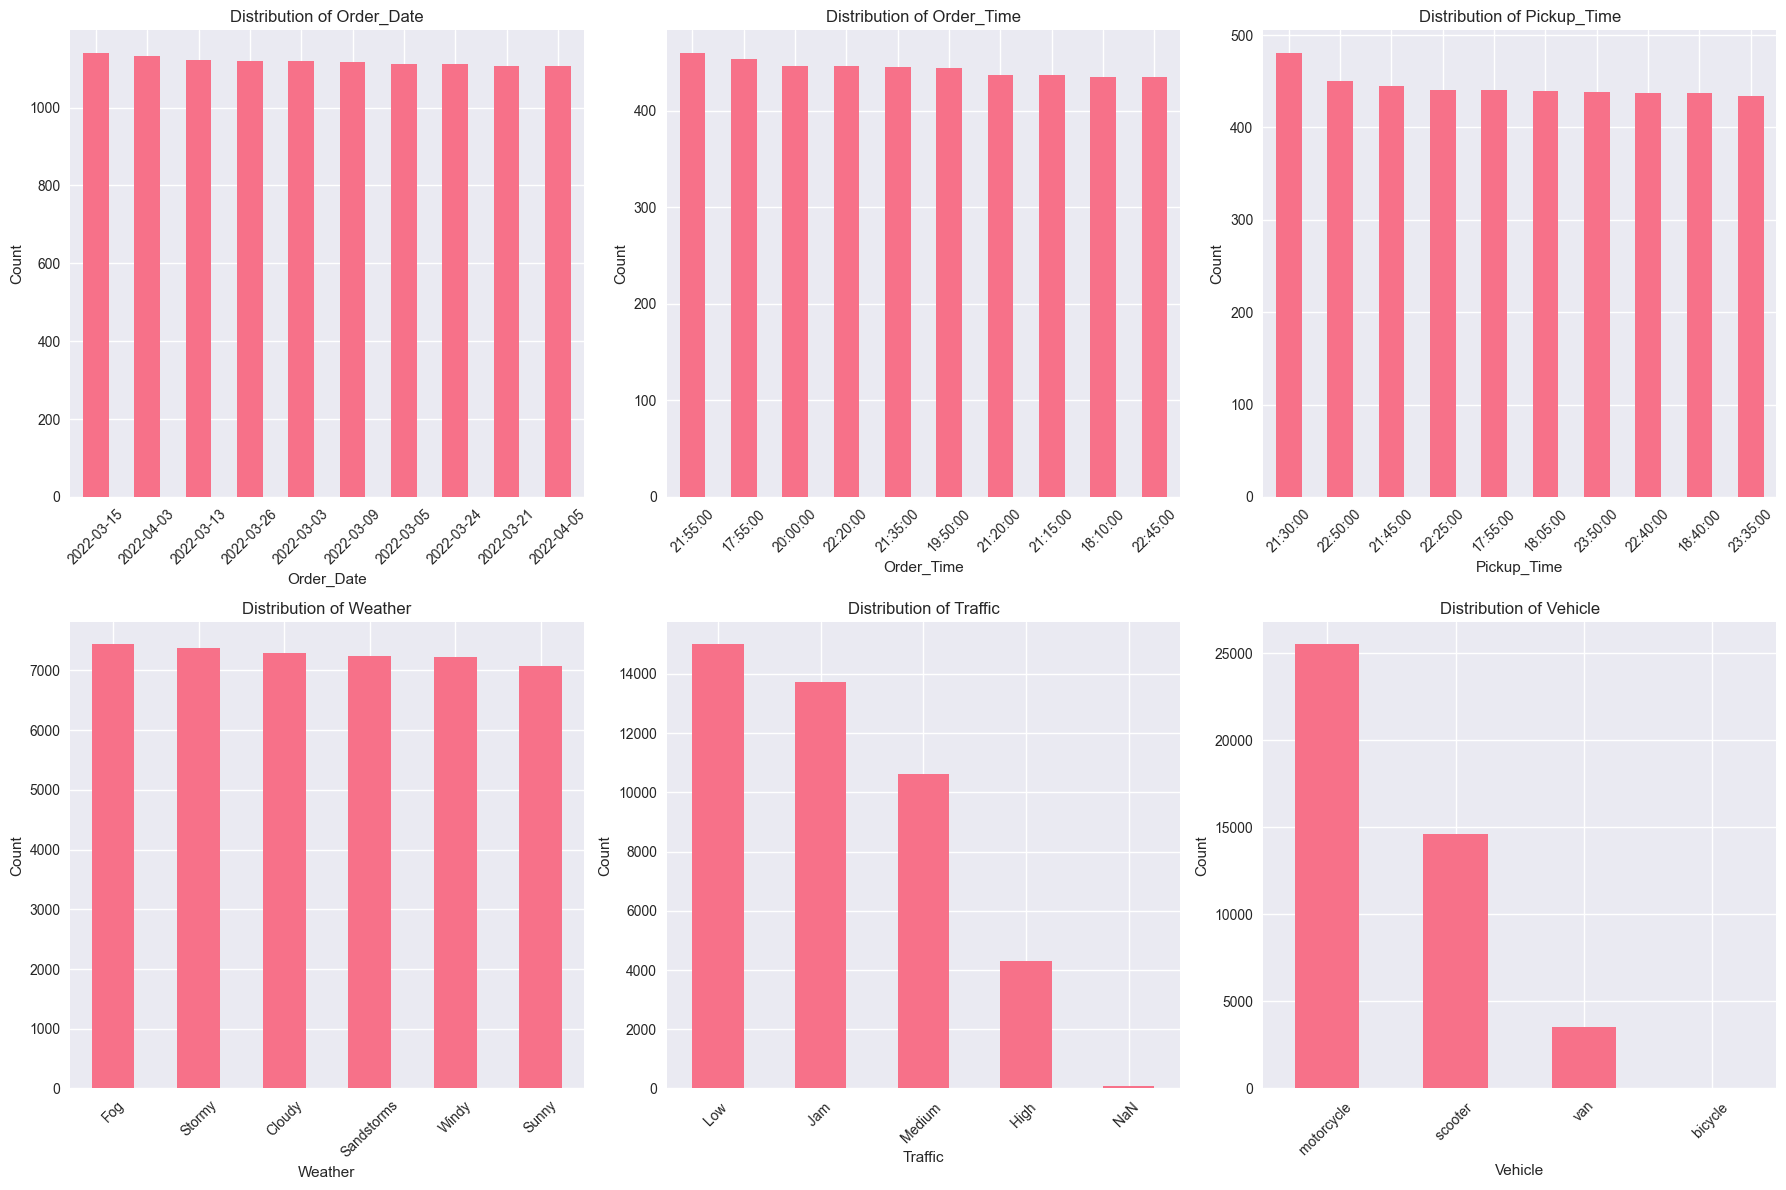

In [40]:
print("=== CATEGORICAL VARIABLES EDA ===")

print("Value Counts for Categorical Variables:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(data[col].value_counts())
    print(f"Number of unique values: {data[col].nunique()}")

# Bar plots for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < 6:
        value_counts = data[col].value_counts()
        if len(value_counts) > 10:  # If too many categories, show top 10
            value_counts = value_counts.head(10)
        value_counts.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Data Cleaning

In [46]:
# 1. Handle Missing Values
print("1. Handling missing values...")

# Agent_Rating - fill with median
data['Agent_Rating'].fillna(data['Agent_Rating'].median(), inplace=True)
print(f"   Agent_Rating: Filled {54} missing values with median")

# Weather - fill with mode
data['Weather'].fillna(data['Weather'].mode()[0], inplace=True)
print(f"   Weather: Filled {91} missing values with mode")

# Traffic - fill with mode  
data['Traffic'].fillna(data['Traffic'].mode()[0], inplace=True)
print(f"   Traffic: Filled {91} missing values with mode")


1. Handling missing values...
   Agent_Rating: Filled 54 missing values with median
   Weather: Filled 91 missing values with mode
   Traffic: Filled 91 missing values with mode


In [49]:
# 2. Check for constant columns
print("\n2. Checking for constant columns...")
constant_cols = []
for col in numerical_cols:
    if data[col].nunique() == 1:
        constant_cols.append(col)
        print(f"    {col} is constant (only one value)")

if constant_cols:
    print(f"   Consider removing: {constant_cols}")
print(f" Constant columns are : {constant_cols}")



2. Checking for constant columns...
 Constant columns are : []


In [50]:
# 3. Handle datetime issues
print("\n3. Handling datetime columns...")

# Convert Order_Date
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

# For time columns, identify and handle NaN values
time_nan_count = data['Order_Time'].isnull().sum() + data['Pickup_Time'].isnull().sum()
print(f"   Time columns have {time_nan_count} NaN values")

# Option 1: Remove rows with NaN times (if small percentage)
if time_nan_count < len(data) * 0.05:  # if less than 5%
    df_clean = data.dropna(subset=['Order_Time', 'Pickup_Time']).copy()
    print(f"   Removed {len(data) - len(df_clean)} rows with NaN times")
else:
    # Option 2: Fill with reasonable defaults
    df_clean = data.copy()
    df_clean['Order_Time'].fillna('12:00:00', inplace=True)
    df_clean['Pickup_Time'].fillna('12:15:00', inplace=True)
    print("   Filled NaN times with default values")

print(f"   Final dataset size: {len(df_clean)} rows")


3. Handling datetime columns...
   Time columns have 0 NaN values
   Removed 0 rows with NaN times
   Final dataset size: 43739 rows


In [53]:
# 4. Verify cleaning
print("\n4. Verification - Missing values after cleaning:")
data.isnull().sum()
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

print("\n✅ Data cleaning completed!")


4. Verification - Missing values after cleaning:
Series([], dtype: int64)

✅ Data cleaning completed!


## EDA after data cleaning

#### Time Analysis EDA

=== TIME ANALYSIS EDA ===
Converting datetime columns...
Removing 91 rows with invalid times
Working with 43648 rows after time cleaning
Extracting time features...

Delivery Time by Hour of Day:
order_hour
0     103.641026
8      93.039227
9      92.519131
10     93.017172
11    125.411282
12    128.485360
13    131.400513
14    130.356688
15    109.936854
16    109.471671
17    130.043796
18    129.372062
19    146.728762
20    148.596803
21    146.427622
22    110.401272
23    107.284349
Name: Delivery_Time, dtype: float64

Delivery Time by Day of Week:
order_day
Friday       126.896009
Monday       124.790713
Saturday     124.983756
Sunday       124.942385
Thursday     119.780352
Tuesday      120.295125
Wednesday    131.709863
Name: Delivery_Time, dtype: float64


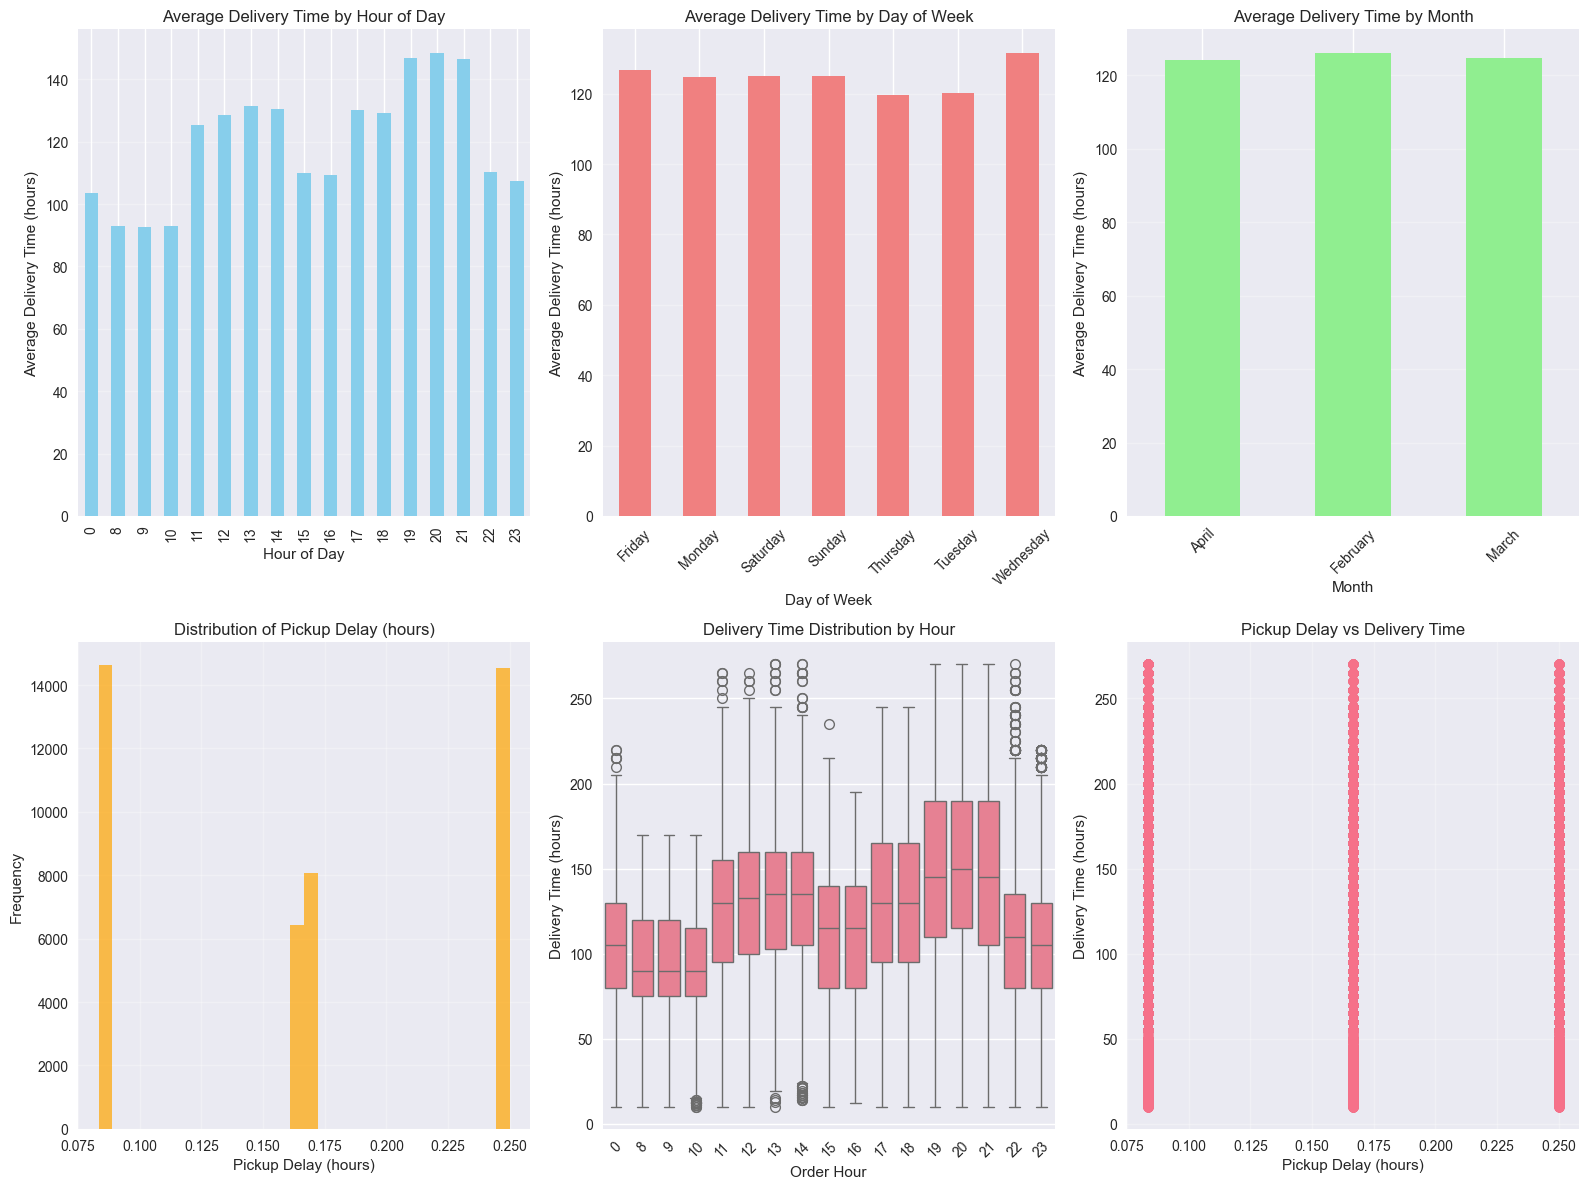


=== TIME INSIGHTS ===
Average pickup delay: 0.17 hours
Correlation between pickup delay and delivery time: -0.009
Busiest order hour: 20 (avg 148.6 hours)
Fastest order hour: 9 (avg 92.5 hours)
Peak delivery hours (above median): [12, 13, 14, 17, 18, 19, 20, 21]


In [56]:
print("=== TIME ANALYSIS EDA ===")

# Use the cleaned dataframe
 # Use your cleaned dataframe

# Convert to datetime with proper error handling
print("Converting datetime columns...")
df_clean['Order_Date'] = pd.to_datetime(df_clean['Order_Date'])

# Handle time columns - convert to datetime time objects
df_clean['Order_Time'] = pd.to_datetime(df_clean['Order_Time'], format='%H:%M:%S', errors='coerce').dt.time
df_clean['Pickup_Time'] = pd.to_datetime(df_clean['Pickup_Time'], format='%H:%M:%S', errors='coerce').dt.time

# Check if we still have any NaN in times after cleaning
nan_order_time = df_clean['Order_Time'].isnull().sum()
nan_pickup_time = df_clean['Pickup_Time'].isnull().sum()

if nan_order_time > 0 or nan_pickup_time > 0:
    print(f"Removing {nan_order_time + nan_pickup_time} rows with invalid times")
    df_clean = df_clean.dropna(subset=['Order_Time', 'Pickup_Time'])

print(f"Working with {len(df_clean)} rows after time cleaning")

# Extract time features
print("Extracting time features...")
df_clean['order_hour'] = [t.hour if t is not None else 12 for t in df_clean['Order_Time']]
df_clean['order_day'] = df_clean['Order_Date'].dt.day_name()
df_clean['order_month'] = df_clean['Order_Date'].dt.month_name()
df_clean['order_day_of_week'] = df_clean['Order_Date'].dt.dayofweek
df_clean['order_month_num'] = df_clean['Order_Date'].dt.month

# Calculate pickup delay (simplified approach)
df_clean['order_hour_num'] = [t.hour + t.minute/60 if t is not None else 12 for t in df_clean['Order_Time']]
df_clean['pickup_hour_num'] = [t.hour + t.minute/60 if t is not None else 12.25 for t in df_clean['Pickup_Time']]
df_clean['pickup_delay_hours'] = df_clean['pickup_hour_num'] - df_clean['order_hour_num']

# Ensure positive pickup delays
df_clean['pickup_delay_hours'] = df_clean['pickup_delay_hours'].apply(lambda x: x if x >= 0 else x + 24)

# Time-based analysis
print("\nDelivery Time by Hour of Day:")
hourly_delivery = df_clean.groupby('order_hour')['Delivery_Time'].mean()
print(hourly_delivery)

print("\nDelivery Time by Day of Week:")
daily_delivery = df_clean.groupby('order_day')['Delivery_Time'].mean()
print(daily_delivery)

# Time trends visualization
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
hourly_delivery.plot(kind='bar', color='skyblue')
plt.title('Average Delivery Time by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delivery Time (hours)')
plt.grid(axis='y', alpha=0.3)

plt.subplot(2, 3, 2)
daily_delivery.plot(kind='bar', color='lightcoral')
plt.title('Average Delivery Time by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Delivery Time (hours)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.subplot(2, 3, 3)
monthly_delivery = df_clean.groupby('order_month')['Delivery_Time'].mean()
monthly_delivery.plot(kind='bar', color='lightgreen')
plt.title('Average Delivery Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (hours)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.subplot(2, 3, 4)
# Pickup delay analysis
plt.hist(df_clean['pickup_delay_hours'], bins=30, alpha=0.7, color='orange')
plt.title('Distribution of Pickup Delay (hours)')
plt.xlabel('Pickup Delay (hours)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.subplot(2, 3, 5)
# Delivery time distribution by hour
sns.boxplot(data=df_clean, x='order_hour', y='Delivery_Time')
plt.title('Delivery Time Distribution by Hour')
plt.xlabel('Order Hour')
plt.ylabel('Delivery Time (hours)')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
# Pickup delay vs Delivery time
plt.scatter(df_clean['pickup_delay_hours'], df_clean['Delivery_Time'], alpha=0.5)
plt.title('Pickup Delay vs Delivery Time')
plt.xlabel('Pickup Delay (hours)')
plt.ylabel('Delivery Time (hours)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Additional time insights
print(f"\n=== TIME INSIGHTS ===")
print(f"Average pickup delay: {df_clean['pickup_delay_hours'].mean():.2f} hours")
print(f"Correlation between pickup delay and delivery time: {df_clean['pickup_delay_hours'].corr(df_clean['Delivery_Time']):.3f}")
print(f"Busiest order hour: {hourly_delivery.idxmax()} (avg {hourly_delivery.max():.1f} hours)")
print(f"Fastest order hour: {hourly_delivery.idxmin()} (avg {hourly_delivery.min():.1f} hours)")

# Peak hours analysis
peak_hours = hourly_delivery[hourly_delivery > hourly_delivery.median()]
print(f"Peak delivery hours (above median): {list(peak_hours.index)}")

#### Relationship with Target Variable 

=== RELATIONSHIP WITH DELIVERY_TIME ===
Numerical Variables vs Delivery Time:


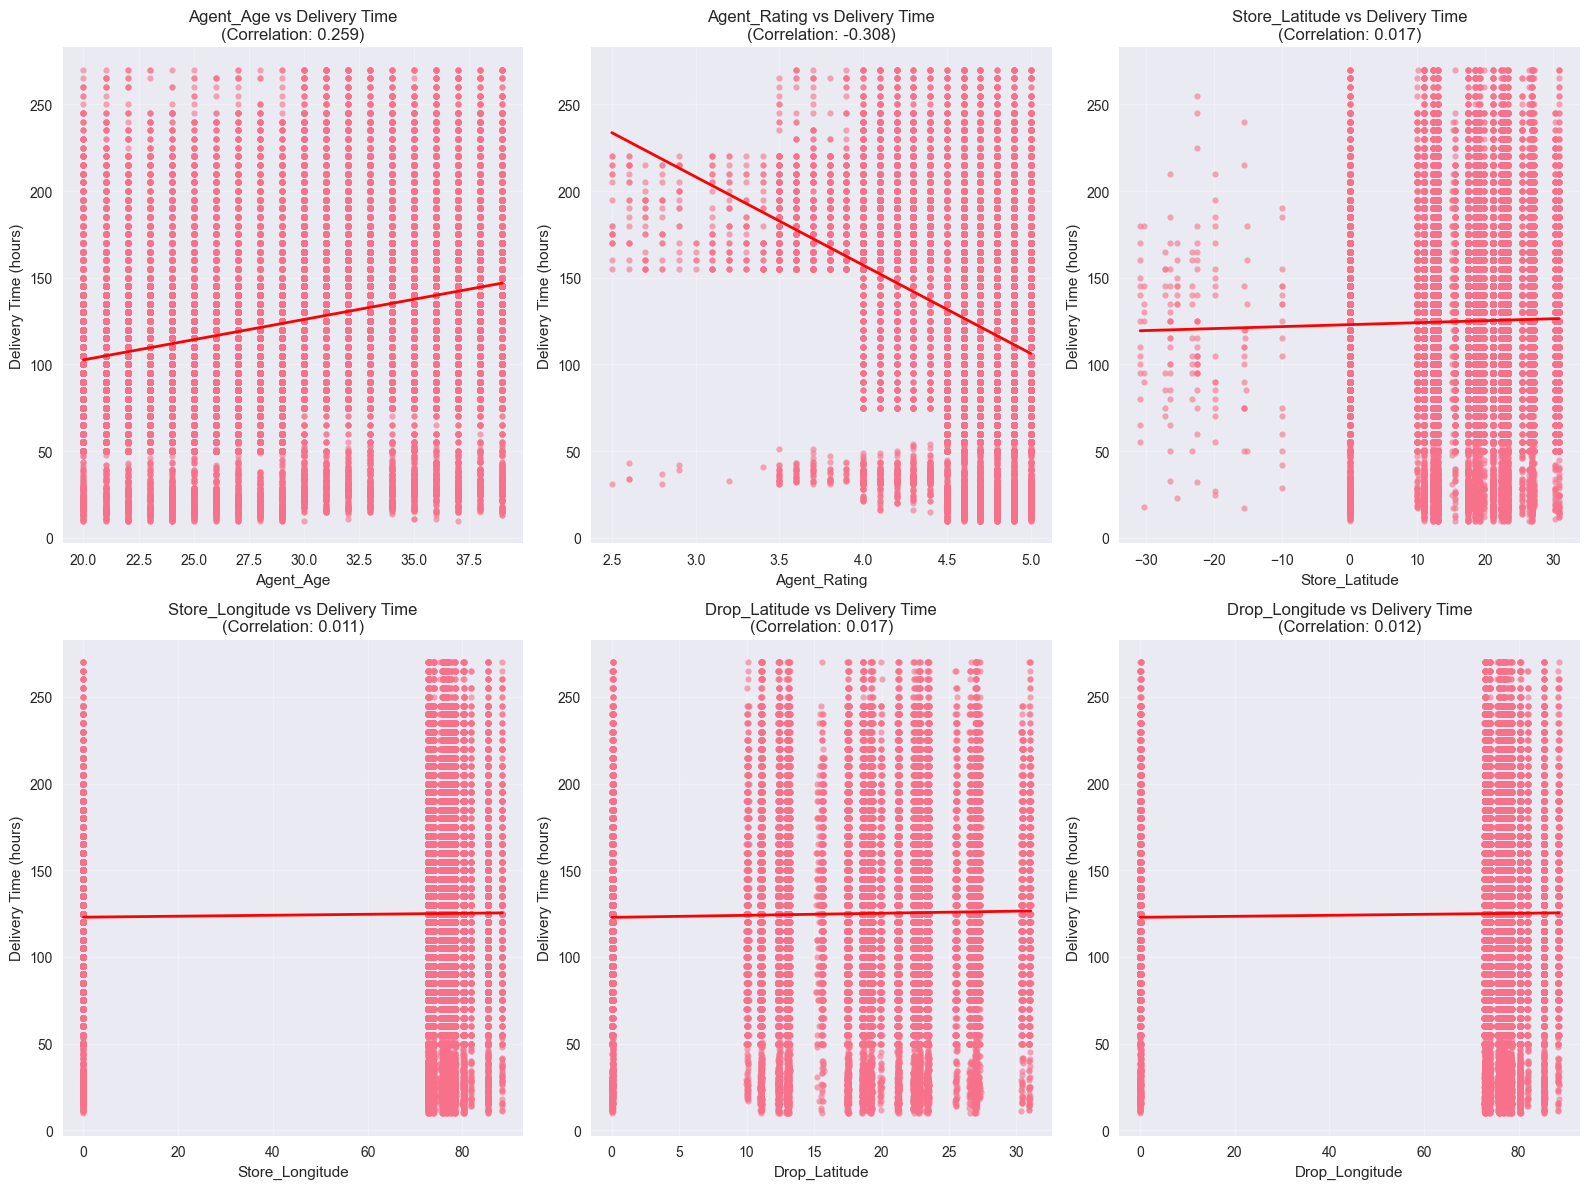


Categorical Variables vs Delivery Time:


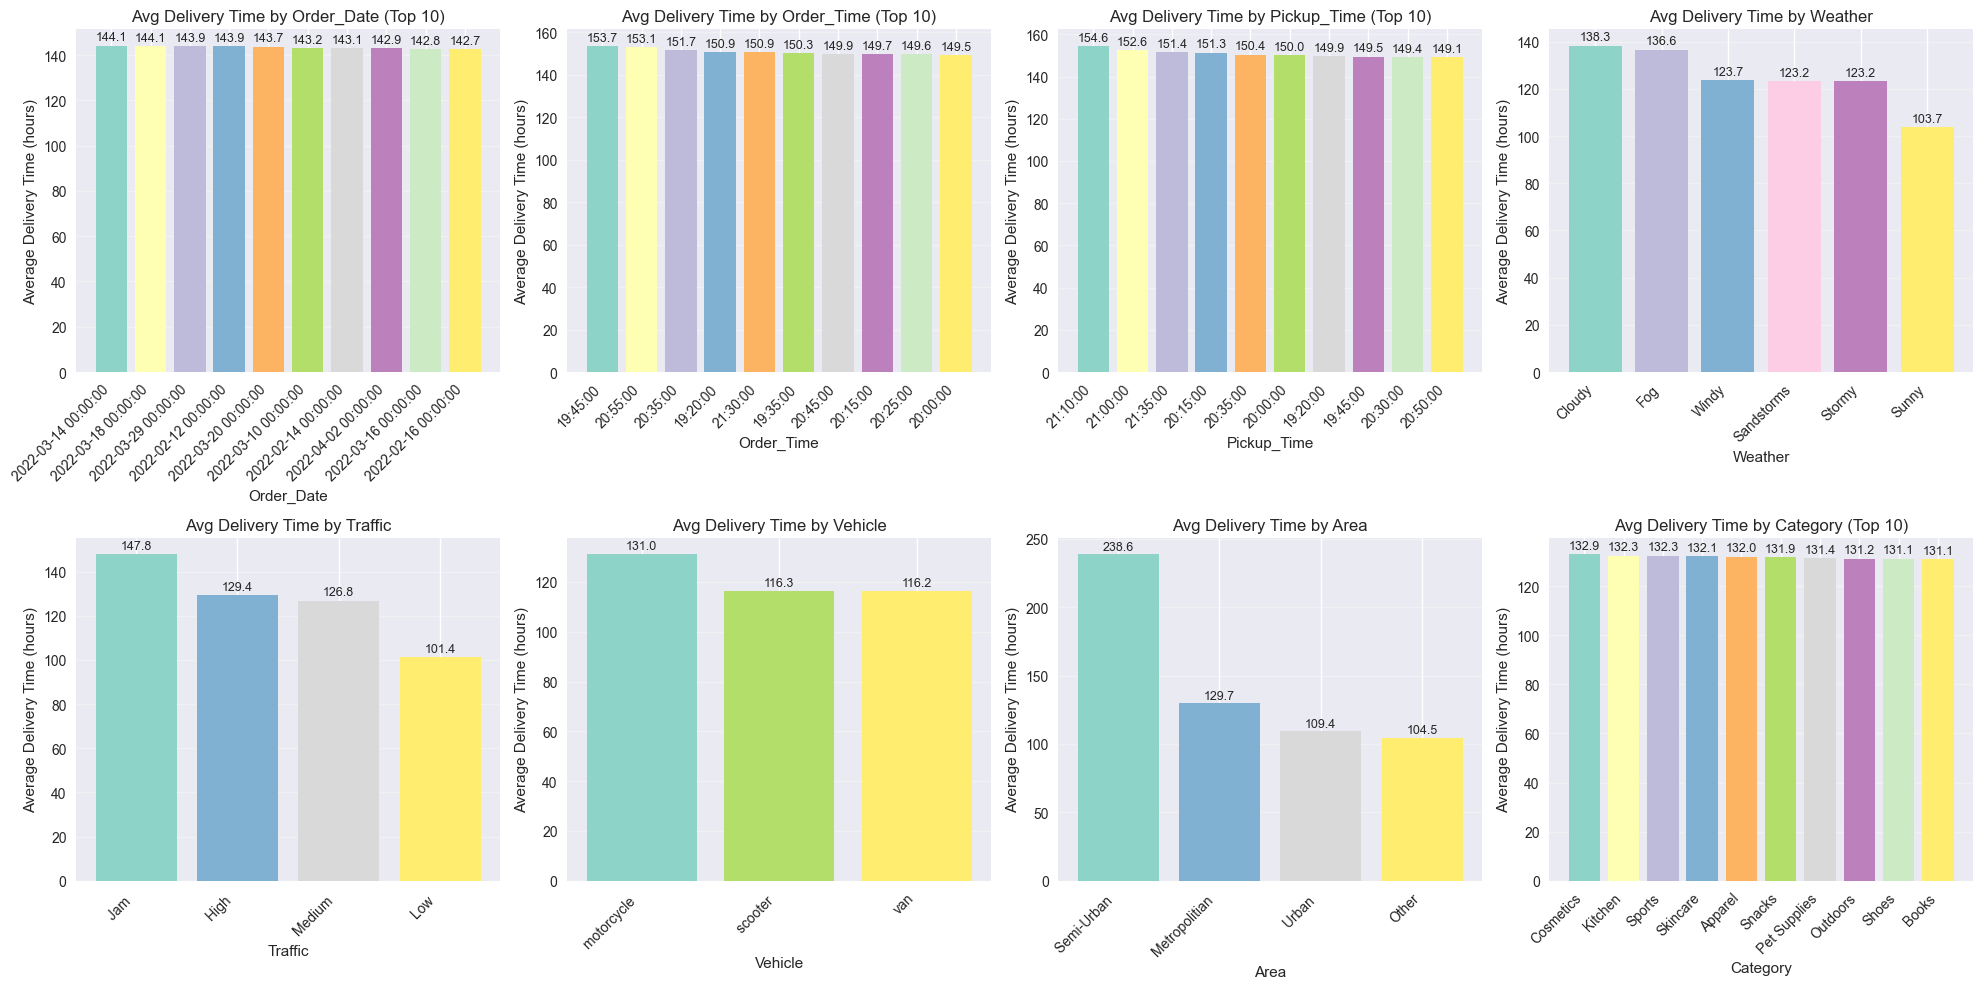


=== STATISTICAL SUMMARY BY CATEGORIES ===

Weather:
              mean    std  count
Weather                         
Cloudy      138.29  55.47   7288
Fog         136.57  57.23   7440
Windy       123.66  48.52   7223
Sandstorms  123.24  48.31   7245
Stormy      123.21  47.80   7374
Sunny       103.66  45.44   7078

Traffic:
           mean    std  count
Traffic                      
Jam      147.76  56.81  13725
High     129.42  48.27   4296
Medium   126.84  48.71  10628
Low      101.35  38.80  14999

Vehicle:
               mean    std  count
Vehicle                          
motorcycle   131.03  53.65  25519
scooter      116.35  48.19  14607
van          116.17  47.84   3522

Area:
                  mean    std  count
Area                                
Semi-Urban      238.55  47.03    152
Metropolitian   129.71  51.59  32634
Urban           109.44  48.22   9726
Other           104.50  45.98   1136


In [57]:
print("=== RELATIONSHIP WITH DELIVERY_TIME ===")

# Use robust plotting with seaborn to avoid polyfit errors
numerical_without_target = [col for col in numerical_cols if col != 'Delivery_Time']

print("Numerical Variables vs Delivery Time:")
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_without_target):
    plt.subplot(2, 3, i+1)
    
    # Clean data for this column
    mask = ~df_clean[col].isnull() & ~df_clean['Delivery_Time'].isnull()
    clean_data = df_clean[mask]
    
    if len(clean_data) > 10 and clean_data[col].std() > 0:
        # Use seaborn regplot which handles errors gracefully
        sns.regplot(data=clean_data, x=col, y='Delivery_Time', 
                   scatter_kws={'alpha':0.6, 's':20}, 
                   line_kws={'color':'red', 'linewidth':2},
                   ci=None)
        
        # Calculate correlation
        correlation = clean_data[col].corr(clean_data['Delivery_Time'])
        plt.title(f'{col} vs Delivery Time\n(Correlation: {correlation:.3f})')
        plt.xlabel(col)
        plt.ylabel('Delivery Time (hours)')
        plt.grid(alpha=0.3)
    else:
        plt.text(0.5, 0.5, f'Insufficient data\nfor analysis', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title(f'{col} vs Delivery Time')
        plt.xlabel(col)
        plt.ylabel('Delivery Time (hours)')

plt.tight_layout()
plt.show()

# Categorical variables vs Delivery_Time
print("\nCategorical Variables vs Delivery Time:")
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < 8:  # Adjust based on number of categorical variables
        # Calculate mean delivery time by category
        category_means = df_clean.groupby(col)['Delivery_Time'].mean().sort_values(ascending=False)
        
        # For high cardinality, show top 10 only
        if len(category_means) > 10:
            category_means = category_means.head(10)
            title_suffix = " (Top 10)"
        else:
            title_suffix = ""
        
        # Create bar plot
        bars = axes[i].bar(range(len(category_means)), category_means.values, 
                          color=plt.cm.Set3(np.linspace(0, 1, len(category_means))))
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Average Delivery Time (hours)')
        axes[i].set_title(f'Avg Delivery Time by {col}{title_suffix}')
        axes[i].set_xticks(range(len(category_means)))
        axes[i].set_xticklabels(category_means.index, rotation=45, ha='right')
        axes[i].grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for bar, value in zip(bars, category_means.values):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                        f'{value:.1f}', ha='center', va='bottom', fontsize=9)

# Hide unused subplots
for i in range(len(categorical_cols), 8):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Statistical summary
print("\n=== STATISTICAL SUMMARY BY CATEGORIES ===")
for col in categorical_cols:
    if df_clean[col].nunique() <= 10:  # Only show for reasonable number of categories
        print(f"\n{col}:")
        stats = df_clean.groupby(col)['Delivery_Time'].agg(['mean', 'std', 'count']).round(2)
        print(stats.sort_values('mean', ascending=False))

## Feature Engineering

In [74]:
print("=== FIXING TRAILING SPACES IN CATEGORICAL DATA ===")

# Remove trailing spaces from categorical columns
df_clean['Traffic'] = df_clean['Traffic'].str.strip()
df_clean['Vehicle'] = df_clean['Vehicle'].str.strip()
df_clean['Area'] = df_clean['Area'].str.strip()
df_clean['Weather'] = df_clean['Weather'].str.strip()
df_clean['Category'] = df_clean['Category'].str.strip()

# Verify the fix
print("Unique values after stripping spaces:")
print(f"Traffic: {df_clean['Traffic'].unique()}")
print(f"Vehicle: {df_clean['Vehicle'].unique()}")
print(f"Area: {df_clean['Area'].unique()}")
print(f"Weather: {df_clean['Weather'].unique()}")

=== FIXING TRAILING SPACES IN CATEGORICAL DATA ===
Unique values after stripping spaces:
Traffic: ['High' 'Jam' 'Low' 'Medium']
Vehicle: ['motorcycle' 'scooter' 'van']
Area: ['Urban' 'Metropolitian' 'Semi-Urban' 'Other']
Weather: ['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']


#### Geographic Features

In [75]:
print("=== CREATING GEOGRAPHIC FEATURES ===")

from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate the great circle distance between two points on the earth"""
    R = 6371  # Earth radius in kilometers
    
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    return R * c

# Calculate distance
df_clean['delivery_distance_km'] = df_clean.apply(
    lambda row: haversine_distance(
        row['Store_Latitude'], row['Store_Longitude'],
        row['Drop_Latitude'], row['Drop_Longitude']
    ), axis=1
)

# Create distance categories
df_clean['distance_category'] = pd.cut(df_clean['delivery_distance_km'], 
                                bins=[0, 5, 15, 50, 100, float('inf')],
                                labels=['Very_Near', 'Near', 'Medium', 'Far', 'Very_Far'])

print("Distance features created!")
print(f"Average delivery distance: {df_clean['delivery_distance_km'].mean():.2f} km")

=== CREATING GEOGRAPHIC FEATURES ===
Distance features created!
Average delivery distance: 27.26 km


#### Agent Performance Features

In [76]:
print("=== CREATING AGENT PERFORMANCE FEATURES ===")

# Agent experience based on rating
df_clean['agent_experience'] = pd.cut(df_clean['Agent_Rating'],
                               bins=[0, 3, 4, 4.7, 5.1],
                               labels=['Beginner', 'Intermediate', 'Experienced', 'Expert'])

# Age groups
df_clean['agent_age_group'] = pd.cut(df_clean['Agent_Age'],
                              bins=[15, 25, 35, 50],
                              labels=['Young', 'Middle', 'Senior'])

# Performance score (combining age and rating)
df_clean['agent_performance_score'] = (df_clean['Agent_Rating'] * 0.7 + 
                                (df_clean['Agent_Age'] / 50) * 0.3)  # Normalize age

print("Agent performance features created!")

=== CREATING AGENT PERFORMANCE FEATURES ===
Agent performance features created!


#### Weather & Traffic Encodings

In [77]:
print("=== ENCODING WEATHER & TRAFFIC ===")

# Weather severity encoding
weather_severity = {
    'Sunny': 1,
    'Cloudy': 2,
    'Windy': 3,
    'Fog': 4,
    'Sandstorms': 5,
    'Stormy': 6
}
df_clean['weather_severity'] = df_clean['Weather'].map(weather_severity)

# Traffic level encoding
traffic_level = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Jam': 4
}
df_clean['traffic_level'] = df_clean['Traffic'].map(traffic_level)

# Combined weather-traffic impact
df_clean['weather_traffic_impact'] = df_clean['weather_severity'] * df_clean['traffic_level']

print("Weather & traffic encodings created!")

=== ENCODING WEATHER & TRAFFIC ===
Weather & traffic encodings created!


#### Vehicle & Area Features

In [78]:
print("=== CREATING VEHICLE & AREA FEATURES ===")

# Vehicle speed capability (hypothetical)
vehicle_speed = {
    'bicycle': 1,
    'scooter': 2,
    'motorcycle': 3,
    'van': 2  # van is slower in traffic
}
df_clean['vehicle_speed_capability'] = df_clean['Vehicle'].map(vehicle_speed)

# Area type encoding
area_density = {
    'Semi-Urban': 1,
    'Urban': 2,
    'Metropolitian': 3,
    'Other': 2
}
df_clean['area_density'] = df_clean['Area'].map(area_density)

# Vehicle-area compatibility
df_clean['vehicle_area_score'] = df_clean['vehicle_speed_capability'] / df_clean['area_density']

print("Vehicle & area features created!")

=== CREATING VEHICLE & AREA FEATURES ===
Vehicle & area features created!


#### Final Cleaned Data

In [93]:
# Essential Features to KEEP:
features_to_keep = [
    # Original numerical features
    'Agent_Age', 'Agent_Rating', 
    
    # Engineered numerical features  
    'delivery_distance_km', 'agent_performance_score',
    'weather_severity', 'traffic_level', 'weather_traffic_impact',
    'vehicle_speed_capability', 'area_density', 'vehicle_area_score',
    'pickup_delay_hours',
    
    # Time features 
    'order_hour',                    # ← Keep this (not order_hour_num)
    'order_day_of_week',             # ← Keep this (not order_day)
    'order_month_num',               # ← Keep this (not order_month)
    
    # Categorical features (will be encoded)
    'distance_category', 'agent_experience', 'agent_age_group',
    'Weather', 'Traffic', 'Vehicle', 'Area', 'Category',
    
    # Target variable
    'Delivery_Time'
]

print(f"Total features to keep: {len(features_to_keep)}")

Total features to keep: 23


In [94]:
# Columns to DELETE (redundant/not useful for modeling):
columns_to_drop = [
    # Identifiers (not predictive)
    'Order_ID',
    
    # Raw coordinates (replaced by distance)
    'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude',
    
    # Raw datetime strings (replaced by engineered features)
    'Order_Date', 'Order_Time', 'Pickup_Time',
    
    # Redundant engineered features
    'order_hour_num',    # duplicate of order_hour
    'order_day',         # categorical version of order_day_of_week  
    'order_month',       # categorical version of order_month_num
    'pickup_hour_num'    # redundant with pickup_delay_hours
]

print(f"Columns to drop: {columns_to_drop}")

Columns to drop: ['Order_ID', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date', 'Order_Time', 'Pickup_Time', 'order_hour_num', 'order_day', 'order_month', 'pickup_hour_num']


In [95]:
print("=== CREATING FINAL MODELING DATASET ===")

# Create final dataset
df_final = df_clean[features_to_keep].copy()

print(f"Final dataset shape: {df_final.shape}")
print(f"Features: {len(df_final.columns) - 1}")  # minus target
print(f"Records: {len(df_final)}")

# Check data types
print("\nFinal feature types:")
print(df_final.dtypes)

=== CREATING FINAL MODELING DATASET ===
Final dataset shape: (43648, 23)
Features: 22
Records: 43648

Final feature types:
Agent_Age                      int64
Agent_Rating                 float64
delivery_distance_km         float64
agent_performance_score      float64
weather_severity               int64
traffic_level                  int64
weather_traffic_impact         int64
vehicle_speed_capability       int64
area_density                   int64
vehicle_area_score           float64
pickup_delay_hours           float64
order_hour                     int64
order_day_of_week              int32
order_month_num                int32
distance_category           category
agent_experience            category
agent_age_group             category
Weather                       object
Traffic                       object
Vehicle                       object
Area                          object
Category                      object
Delivery_Time                  int64
dtype: object


In [96]:
# Verify no missing values
print("Missing values check:")
print(df_final.isnull().sum()[df_final.isnull().sum() > 0])

# Verify feature types
categorical_count = len(df_final.select_dtypes(include=['object', 'category']).columns)
numerical_count = len(df_final.select_dtypes(include=['int64', 'float64']).columns) - 1  # minus target

print(f"\nCategorical features: {categorical_count}")
print(f"Numerical features: {numerical_count}")
print(f"Total features for modeling: {categorical_count + numerical_count}")

Missing values check:
Series([], dtype: int64)

Categorical features: 8
Numerical features: 12
Total features for modeling: 20
